In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data_rev_comma_separated.csv")

# 1. Data Understanding

In [3]:
df.sample(15)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,total_pymnt,total_rec_int,default_ind
408705,13146049,15168248,9000,36 months,12.49,2 years,RENT,36000.00,debt_consolidation,916xx,CA,6321.84,1482.60,0
39615,127830,127824,8000,36 months,12.17,9 years,MORTGAGE,70000.00,credit_card,337xx,FL,7294.65,1474.29,1
184725,1620522,1892477,6000,36 months,15.31,10+ years,MORTGAGE,55000.00,credit_card,151xx,PA,7.055.974.134,1055.97,0
51412,9227442,11049413,6000,36 months,13.67,10+ years,RENT,45000.00,debt_consolidation,271xx,NC,6.789.886.892,789.89,0
524300,62469486,66732212,16000,36 months,9.17,5 years,RENT,36000.00,debt_consolidation,368xx,AL,1011.99,233.42,0
482002,65954947,70649680,21600,60 months,7.26,1 year,MORTGAGE,101000.00,home_improvement,914xx,CA,412.95,113.26,0
277093,29695507,32228785,20000,36 months,7.69,6 years,MORTGAGE,99864.00,credit_card,761xx,TX,9349.66,1570.96,0
492158,65744915,70377694,14000,36 months,5.32,10+ years,MORTGAGE,125000.00,debt_consolidation,317xx,GA,415.4,55.86,0
603848,58693340,62534095,3600,36 months,10.99,10+ years,RENT,52325.52,debt_consolidation,104xx,NY,467,122.79,0
412283,13006441,15038627,30000,60 months,16.59,6 years,MORTGAGE,158000.00,home_improvement,615xx,IL,15518.58,7680.63,0


In [4]:
df.shape

(855969, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              855969 non-null  int64  
 1   member_id       855969 non-null  int64  
 2   loan_amnt       855969 non-null  int64  
 3   term            855969 non-null  object 
 4   int_rate        855969 non-null  float64
 5   emp_length      812908 non-null  object 
 6   home_ownership  855969 non-null  object 
 7   annual_inc      855969 non-null  float64
 8   purpose         855969 non-null  object 
 9   zip_code        855969 non-null  object 
 10  addr_state      855969 non-null  object 
 11  total_pymnt     855969 non-null  object 
 12  total_rec_int   855969 non-null  float64
 13  default_ind     855969 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 91.4+ MB


# 2. Data Preparation

In [6]:
# Convert total_pymnt string to total_payment float
df['total_payment'] = df['total_pymnt'].str.replace('.','', regex=False).astype(float)

# Convert emp_length from object to float
def convert_emp_length(value):
    if pd.isna(value):
        return np.nan
    if '<' in value:
        return 0
    if '10+' in value:
        return 10
    else:
        return int(value.split()[0])
    
df['emp_length_nums'] = df['emp_length'].apply(convert_emp_length)

In [7]:
df.shape

(855969, 16)

In [8]:
cats = ['home_ownership','purpose','default_ind']
nums = ['loan_amnt','int_rate','emp_length_nums','annual_inc','total_payment','total_rec_int']
geo = ['zip_code','addr_state']

In [9]:
df.isna().sum()

id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
emp_length         43061
home_ownership         0
annual_inc             0
purpose                0
zip_code               0
addr_state             0
total_pymnt            0
total_rec_int          0
default_ind            0
total_payment          0
emp_length_nums    43061
dtype: int64

In [10]:
# Duplicate values
duplicates = df.loc[df.duplicated()]

if not duplicates.empty:
    print(duplicates)
else:
    print("There is no duplicate values in this dataset")

There is no duplicate values in this dataset


# 3. Feature Understanding

## Univariate Analysis


In [11]:
df[nums].describe()

,loan_amnt,int_rate,emp_length_nums,annual_inc,total_payment,total_rec_int
count,855969.000000,855969.000000,812908.000000,8.559690e+05,8.559690e+05,855969.000000
mean,14745.571335,13.192320,6.019334,7.507119e+04,3.040335e+08,1755.046221
std,8425.340005,4.368365,3.663588,6.426447e+04,1.217892e+09,2081.692980
min,500.000000,5.320000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,9.990000,3.000000,4.500000e+04,1.262240e+05,451.270000
50%,13000.000000,12.990000,6.000000,6.500000e+04,4.042350e+05,1076.910000
75%,20000.000000,15.990000,10.000000,9.000000e+04,1.111748e+06,2233.980000
max,35000.000000,28.990000,10.000000,9.500000e+06,9.999728e+09,24205.620000


## Numericals

<function matplotlib.pyplot.show(close=None, block=None)>

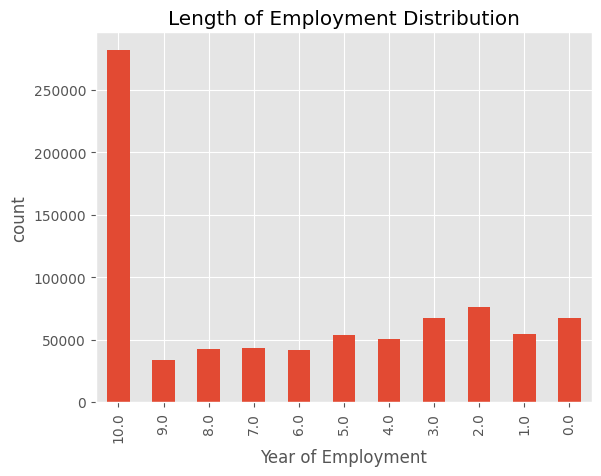

In [12]:
emp_dist = df['emp_length_nums'].value_counts().sort_index(ascending=False).plot(kind='bar', title='Length of Employment Distribution')
emp_dist.set_xlabel('Year of Employment')
emp_dist.set_ylabel('count')
plt.show

c:\Users\rizar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\rizar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\rizar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\rizar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\rizar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:159

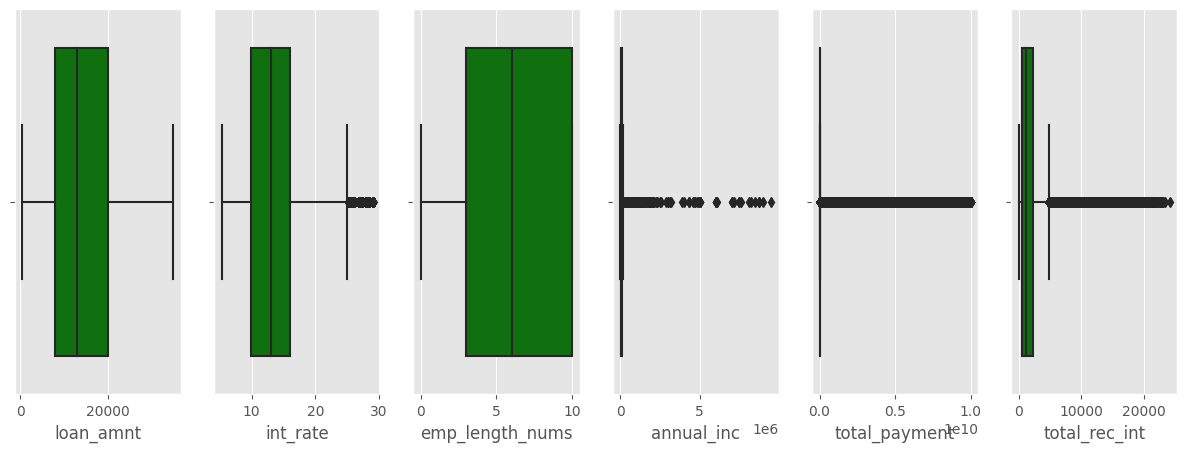

In [13]:
# Numericals Boxplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(x=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
    plt.tight_layout
    plt.show

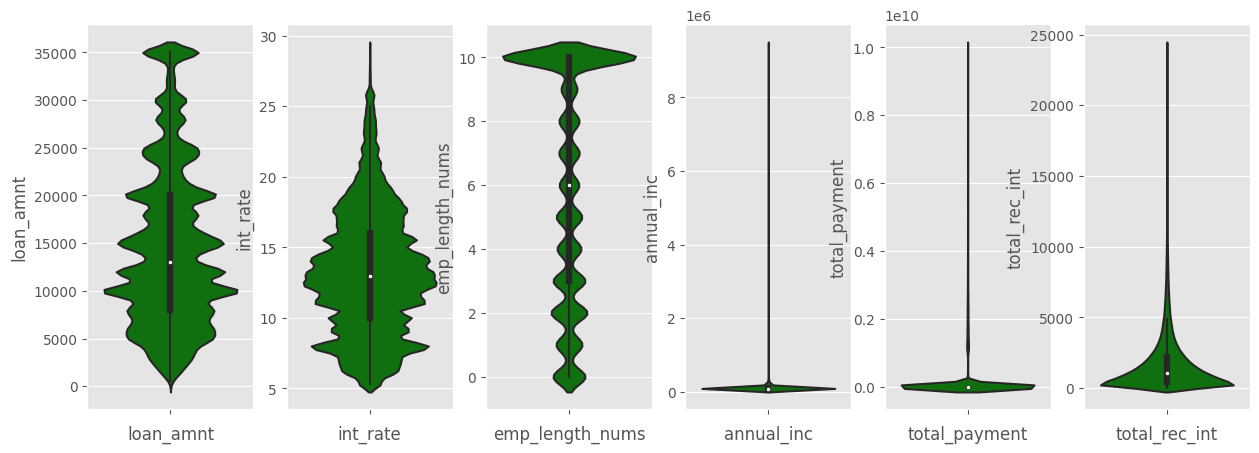

In [14]:
# Numericals Violinplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
    plt.tight_layout
    plt.show

C:\Users\rizar\AppData\Local\Temp\ipykernel_28844\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\rizar\AppData\Local\Temp\ipykernel_28844\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\rizar\AppData\Local\Temp\ipykernel_28844\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\rizar\AppData\Local\Temp\ipykernel_28844\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error

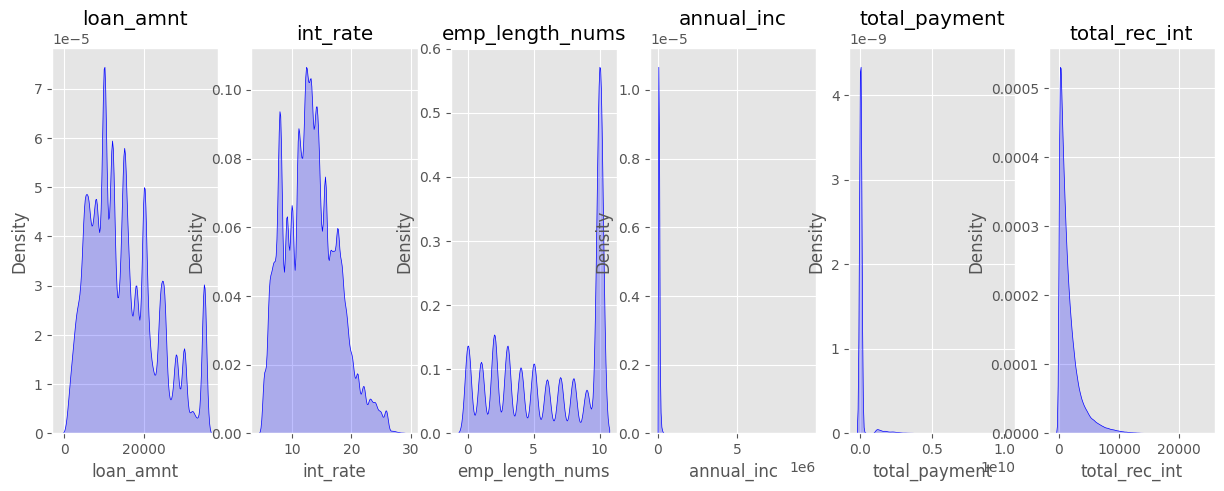

In [15]:
# Numericals KDE Plot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.kdeplot(df[nums[i]], color='blue', shade=True)
    plt.title(nums[i])
    
    plt.tight_layout
    plt.show

## Geo

<function matplotlib.pyplot.show(close=None, block=None)>

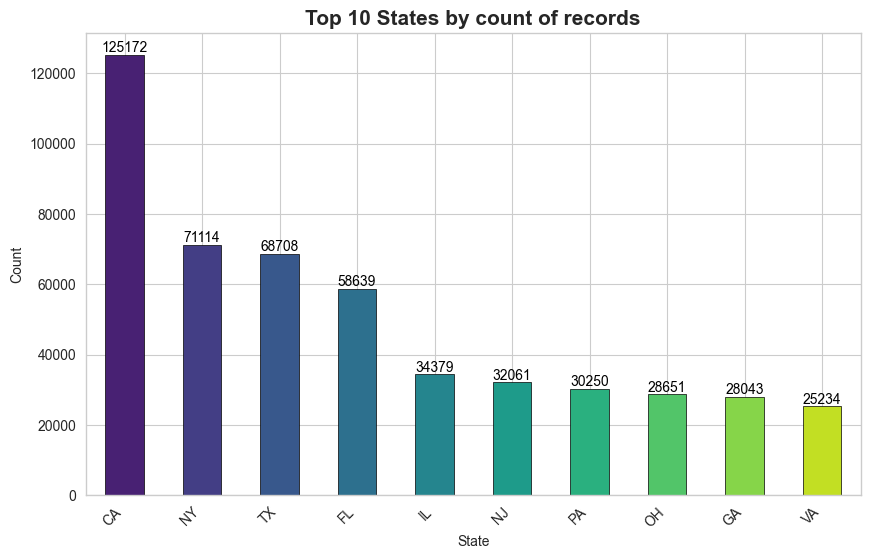

In [16]:
# Barplot for State

sns.set_style('whitegrid')
palette = sns.color_palette('viridis', 10)

plt.figure(figsize=(10,6))
ax = df['addr_state'].value_counts().head(10) \
    .plot(kind= 'bar', color= palette, edgecolor='black')

ax.set_title('Top 10 States by count of records', fontsize= 15, fontweight='bold')
ax.set_xlabel('State', fontsize=10)
ax.set_ylabel('Count', fontsize= 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), textcoords='offset points', 
        fontsize=10, color='black'
    )
    
plt.tight_layout
plt.show

In [23]:
df['zip_code'].value_counts().head(10)

945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
100xx    7348
070xx    7143
331xx    7139
900xx    7022
770xx    6657
Name: zip_code, dtype: int64

## Categoricals

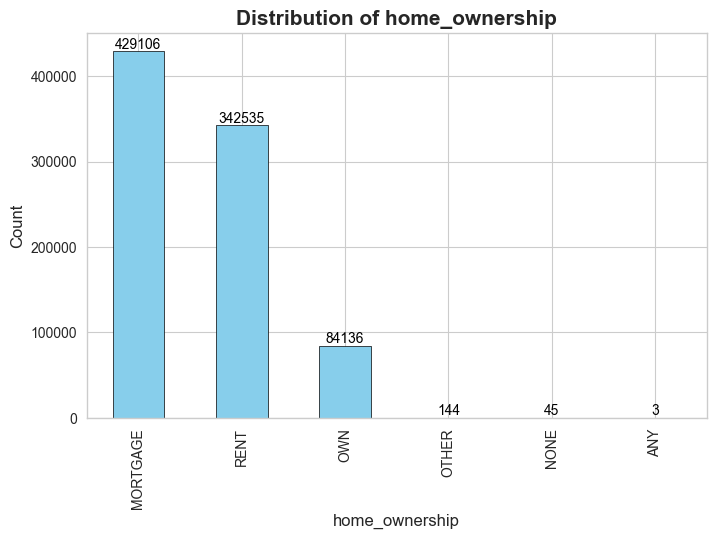

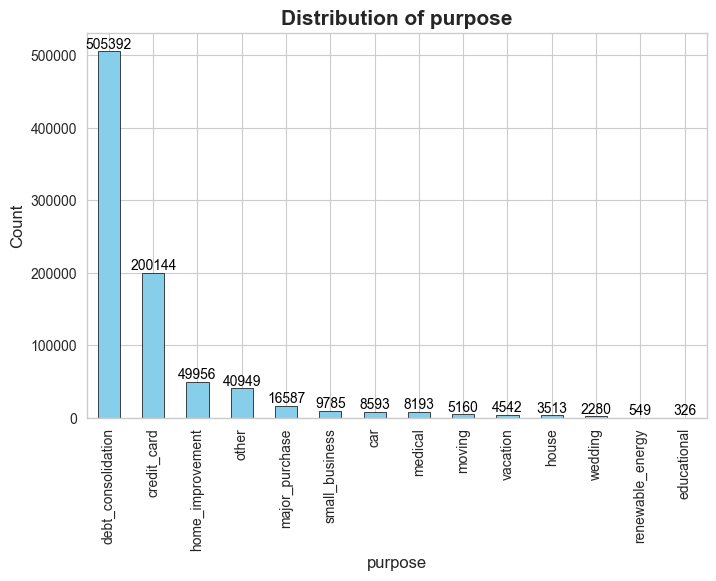

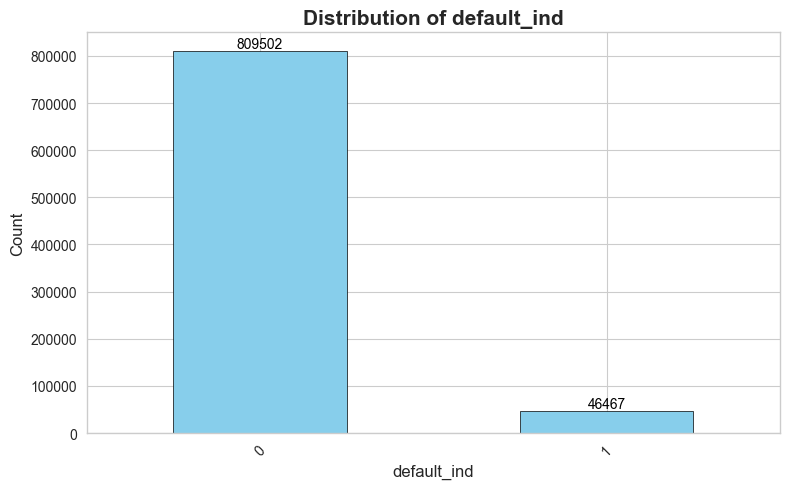

In [17]:
# Categorical values distribution

sns.set_style('whitegrid')

for cat in cats:
    plt.figure(figsize=(8,5))
    ax = df[cat].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    ax.set_title(f'Distribution of {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Display values on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
        
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

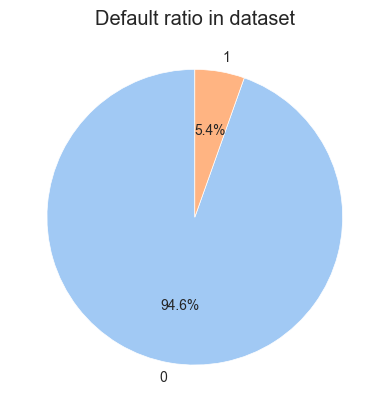

In [19]:
# Default Percentage represented in pie chart

df['default_ind'].value_counts().plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('Default ratio in dataset')
plt.ylabel('')
plt.show()

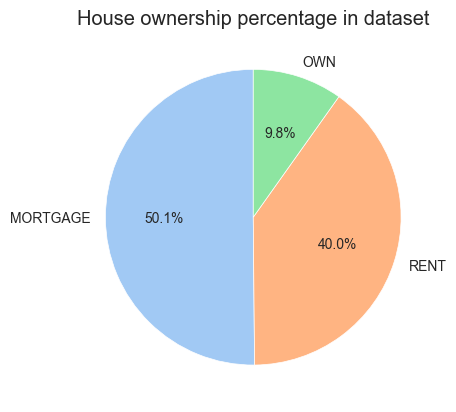

In [21]:
# House ownership status Percentage represented in pie chart

df['home_ownership'].value_counts().head(3).plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('House ownership percentage in dataset')
plt.ylabel('')
plt.show()

# 4. Feature Relationships

### Pairplot

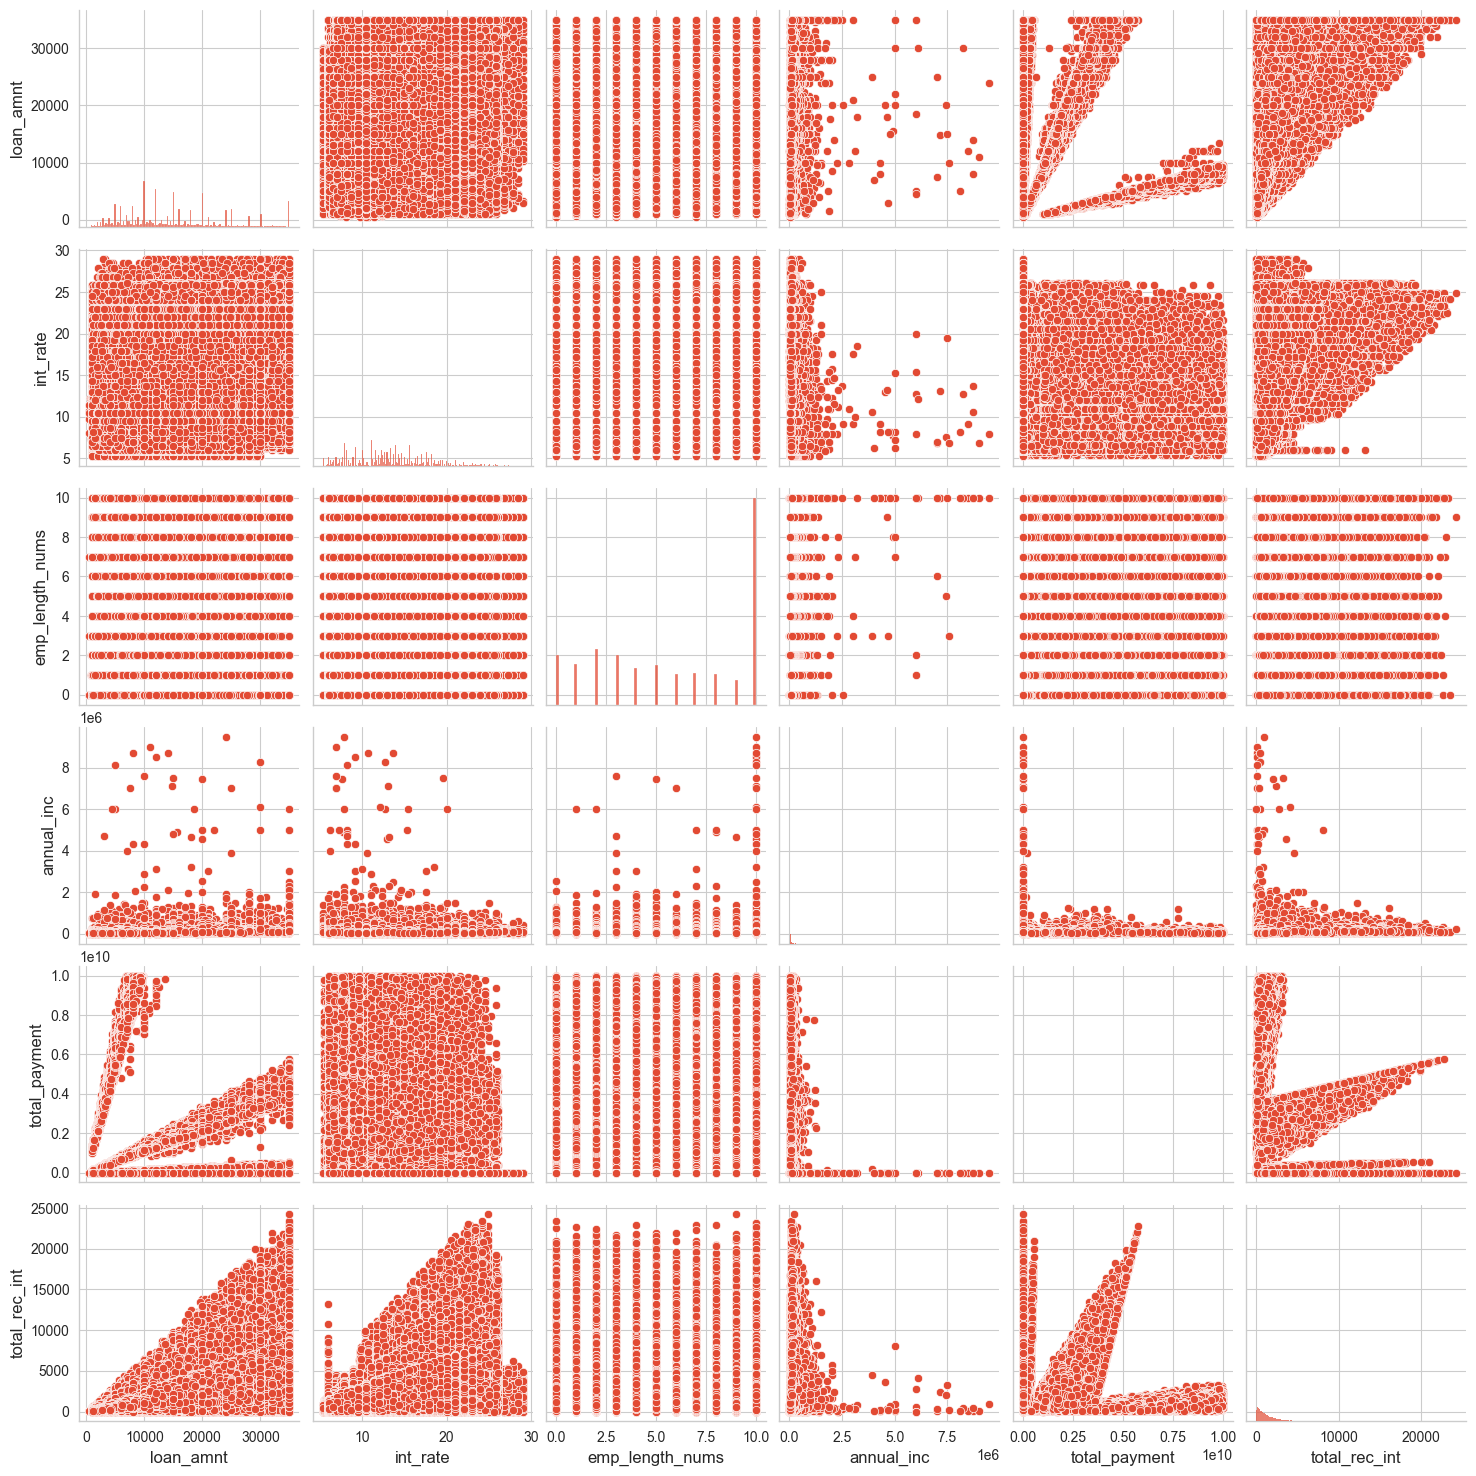

In [25]:
sns.pairplot(df, vars=nums)
plt.show()

### Correlation Heatmap

C:\Users\rizar\AppData\Local\Temp\ipykernel_28844\1727787355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.dropna().corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


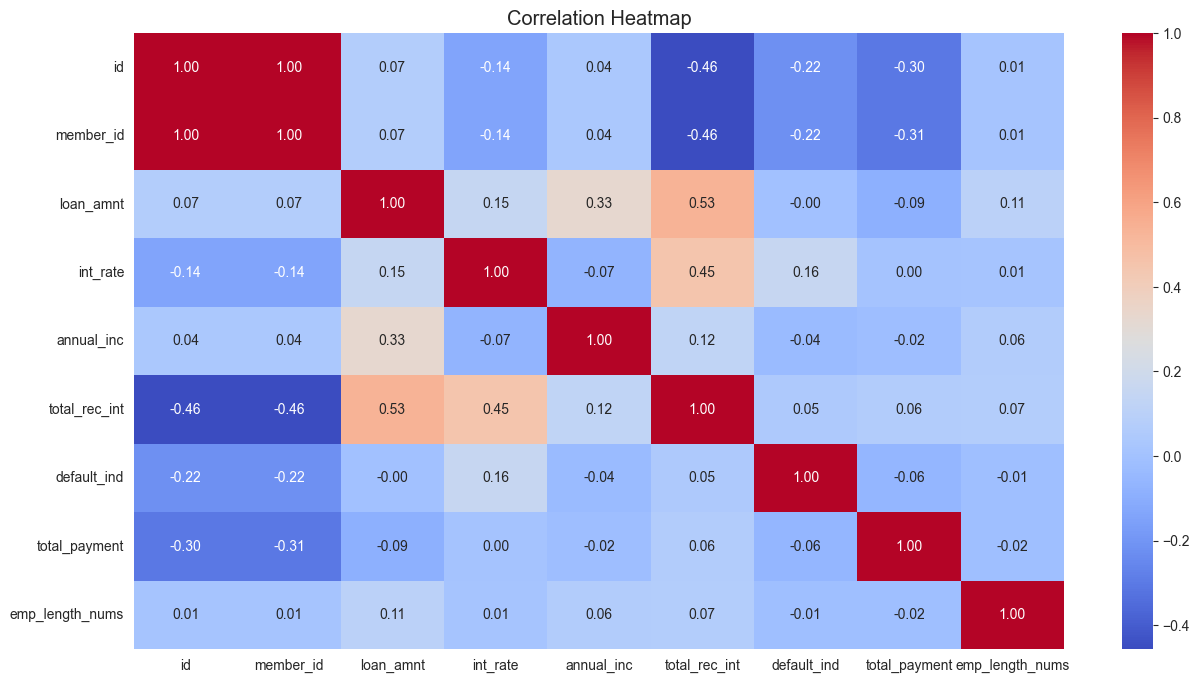

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.dropna().corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()